## Pre-trained image recognition networks
Uses pre-trained ConvNet networks trained for the ImageNet challenge.

In [1]:
# Import the necessary packages
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from PIL import Image
import requests
from matplotlib.pyplot import imshow
%matplotlib inline

# Available models in Keras
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow ONLY
    "resnet": ResNet50
}

# Loads the pre-trained model
def load_model(model):
    # Check that the model is valid
    if model not in MODELS.keys():
        raise AssertionError("Invalid model {}".format(model))

    # Initialize the input image shape (224x224 pixels) along with
    # the pre-processing function (this might need to be changed
    # based on which model we use to classify our image)
    inputShape = (224, 224)
    preprocess = imagenet_utils.preprocess_input

    # If we are using the InceptionV3 or Xception networks, then we
    # need to set the input shape to (299x299) [rather than (224x224)]
    # and use a different image processing function
    if model in ("inception", "xception"):
        inputShape = (299, 299)
        preprocess = preprocess_input

    # Load our the network weights
    print("Loading model {}".format(model))
    Network = MODELS[model]
    model = Network(weights="imagenet")
    return model,inputShape,preprocess

# Classifies an image, i.e. tries to find what's in the picture
def classify_image(image_path):
    # Load the input image using the Keras helper utility while ensuring
    # the image is resized to `inputShape`, the required input dimensions
    # for the ImageNet pre-trained network
    print("Loading and pre-processing image '{}'".format(image_path))
    # Load from url
    raw = Image.open(requests.get(url, stream=True).raw)
    image = raw.resize(size=inputShape)
    image = img_to_array(image)
    # Load from file
    #image = load_img(content, target_size=inputShape)
    #image = img_to_array(image)

    # Our input image is now represented as a NumPy array of shape
    # (inputShape[0], inputShape[1], 3) however we need to expand the
    # dimension by making the shape (1, inputShape[0], inputShape[1], 3)
    # so we can pass it through the network
    image = np.expand_dims(image, axis=0)

    # Pre-process the image using the appropriate function based on the
    # model that has been loaded (i.e., mean subtraction, scaling, etc.)
    image = preprocess(image)

    # Classify the image
    print("Classifying image with model '{}'".format(model.name))
    preds = model.predict(image)
    P = imagenet_utils.decode_predictions(preds)

    # Loop over the predictions and display the rank-5 predictions +
    # probabilities to our terminal
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
        
    # Return image
    return raw

# Shows an image
def show(img):
    imshow(np.asarray(img))

# Load the model we want
print("TensorFlow version:", tf.__version__)
model,inputShape,preprocess = load_model("xception")

TensorFlow version: 2.0.0
Loading model xception


Loading and pre-processing image 'https://raw.githubusercontent.com/jhagelback/ml-workshop/master/images/soccer_ball.jpg'
Classifying image with model 'xception'
1. soccer_ball: 92.84%
2. volleyball: 2.36%
3. rugby_ball: 0.74%
4. croquet_ball: 0.07%
5. balloon: 0.07%


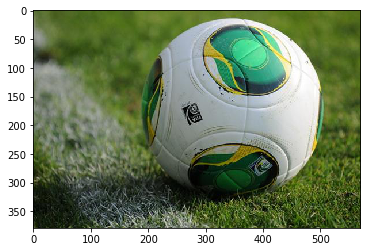

In [2]:
url = "https://raw.githubusercontent.com/jhagelback/ml-workshop/master/images/soccer_ball.jpg"
img = classify_image(url)
show(img)

Loading and pre-processing image 'https://raw.githubusercontent.com/jhagelback/ml-workshop/master/images/boat.png'
Classifying image with model 'xception'
1. wreck: 93.17%
2. seashore: 0.59%
3. gondola: 0.17%
4. sea_lion: 0.14%
5. amphibian: 0.12%


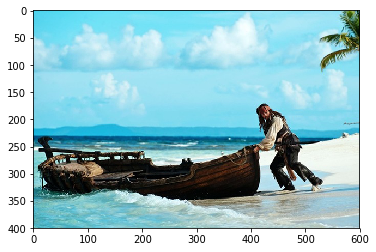

In [3]:
url = "https://raw.githubusercontent.com/jhagelback/ml-workshop/master/images/boat.png"
img = classify_image(url)
show(img)